In [99]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

seven subheadings, every 14 lines

In [51]:
def get_nice_dataframe(rouge_scheme):
    # rouge scheme is either 4 (1 gram recall) 8 (2 gram recall) or 12 (l-gram recall)
    # this is just the number of lines down it is
    recall_lines = [4,8,12]
    data = {
        "file":[],
        "size_3_thresh_1":[],
        "size_3_thresh_3":[],
        "size_3_thresh_6":[],
        "size_3_thresh_8":[],
        "size_3_thresh_99":[],
        "size_3_no_threshold":[],
        "human":[],
        "random_summary":[],
        
    }

    for fi in glob.glob("resources/results/*.txt"):
        if "human" not in fi and fi != "resources/results/summary.txt":
            with open(fi) as file_obj:
                summary_name = fi.split("/")[-1]
                data["file"].append(summary_name) # add the filename to the data
                try:
                    with open("resources/results/human_{}.txt".format(summary_name[:-5])) as human_file:
                        human_lines = human_file.readlines()
                        data["human"].append(float(human_lines[55 + rouge_scheme].split()[-1]))
                except FileNotFoundError:
                    data["human"].append(None)
                # this is the file d30001.txt or w/e
                lines = file_obj.readlines()
                base = 0
                while base < len(lines):
                    scheme_name = lines[base].split("/")[-1].split(".")[0] # just getting the name
                    recall = float(lines[base + rouge_scheme].split()[-1]) # the last item in a space split is the number
                    data[scheme_name].append(recall)
                    base += 14
    return pd.DataFrame(data)
                    

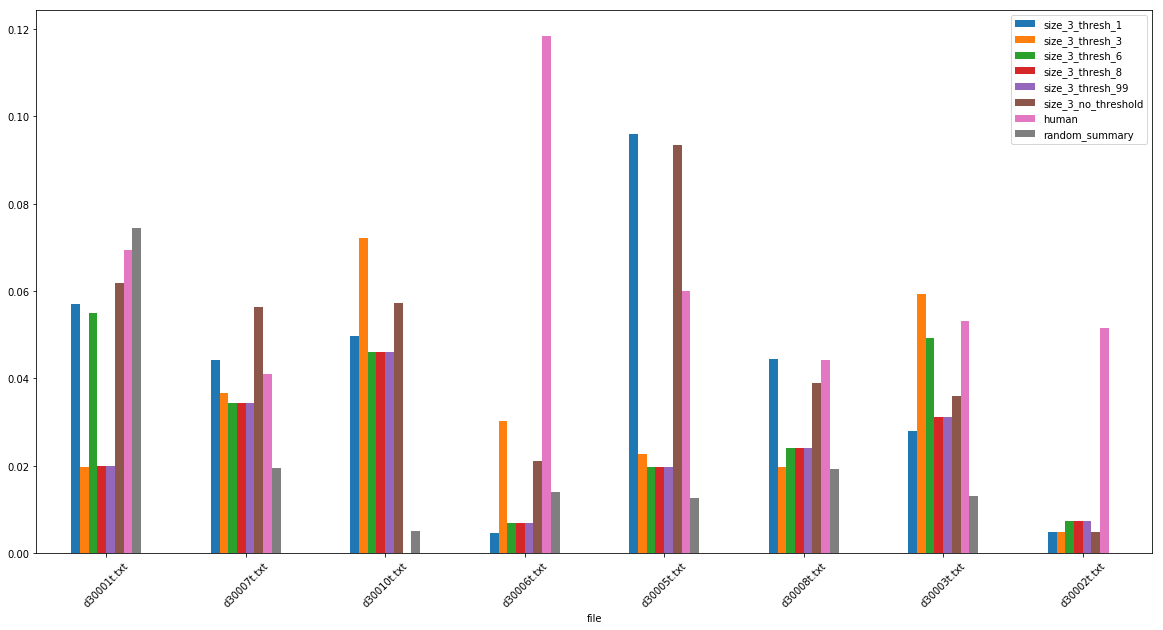

In [81]:
get_nice_dataframe(8).plot(x="file",kind="bar", figsize=(20,10),rot=45)

In [71]:
def get_dataframe_of_avg_results(rouge_scheme):
    data = {
        "method":[],
        "average_recall":[],
    }
    with open("resources/results/summary.txt") as file_obj:
        lines = file_obj.readlines()
        base = 0
        while base < len(lines):
            scheme_name = lines[base].split(".")[0] # just getting the name
            data["method"].append(scheme_name)
            recall = float(lines[base + rouge_scheme].split()[-1]) # the last item in a space split is the number
            data["average_recall"].append(recall)
            base += 14
    return pd.DataFrame(data)

In [150]:
get_dataframe_of_avg_results(8).plot(x="method",kind="bar", figsize=(20,8),fontsize=20,rot=45)

In [155]:
def get_average_relative_rank(df):
    data = {
        "size_3_thresh_1":[],
        "size_3_thresh_3":[],
        "size_3_thresh_6":[],
        "size_3_thresh_8":[],
        "size_3_thresh_99":[],
        "size_3_no_threshold":[],
        "human":[],
        "random_summary":[],
    }
    ret = {
        "methods":[],
        "average_rankings":[]
    }
    # make a list of lists of tuples so we can sort
    for index, row in df.iterrows():
        mat = []
        for key in row.keys():
            if key != "file":
                mat.append((key,row[key]))
                # print(row[key])
        mat.sort(key=lambda a:a[1])

        for ind, (scheme, value) in enumerate(mat):
            data[scheme].append(ind + 1)
   
    for key in data.keys():
        ret["methods"].append(key)
        ret["average_rankings"].append(np.mean(data[key]))
    return pd.DataFrame(ret)

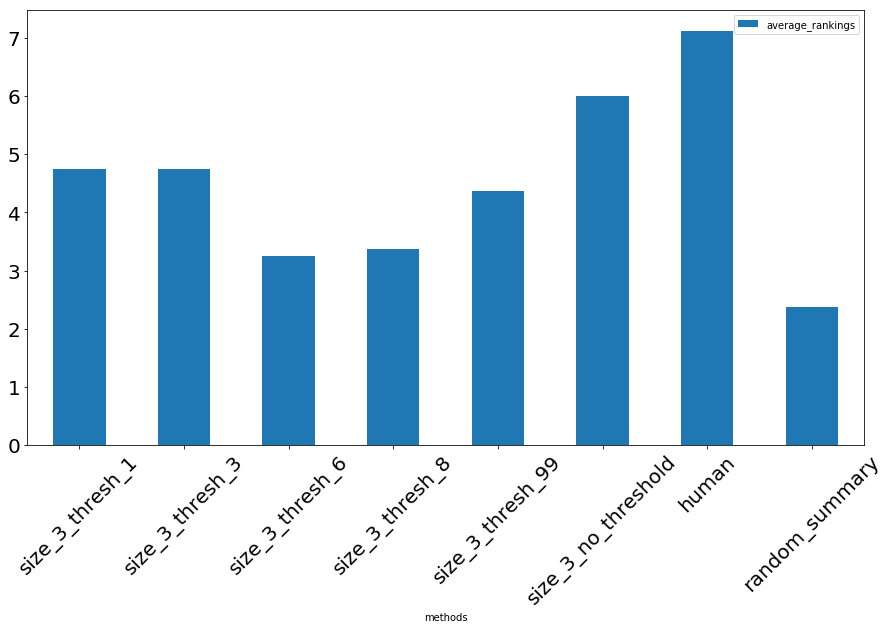

In [162]:
get_average_relative_rank(get_nice_dataframe(8)).plot(x="methods",kind="bar",figsize=(15,8),fontsize=20,rot=45)